# Hacking the Humanities Week 3: Analysing Corpora

Last week we learned how to analyse a text. This week, we are going to analyse a corpus. A corpus is simply a collection of texts (or, if you have a taste for Latin, a 'body' of texts). You are going to learn how to structure a program so that you can perform a task on many texts at once, and also learn how to organise your data in Python so you can easily call up particular texts from a large corpus for closer inspection.

We are also going to go a bit deeper into the problem of pre-processing. You have seen how punctuation, capital letters and special characters (e.g. `é`, `ç` or `ł`) can make it complicated to get from the tokens of a text to the types they represent. This week you will learn how to use **regular expressions**, powerful tools for flexibly interacting with text. Other popular languages like `R` and `JavaScript` use regular expressions in much the same way Python does, so you can easily take what you learn here into other projects.

## Section 1: The `list` and `dict` types, revisited

So far you have been implementing Python commands one at a time. This will obviously become very tedious if you have to deal with more than two or three texts. What if you want to run a stylometric analysis on all 6 of Jane Austen's novels, or all 32 of Shakespeare's plays, or on a historical corpus of thousands of letters or millions of newspaper articles?

To work with a corpus, we are going to learn to use two new features of Python: `for` loops, which will allow us to apply code repeatedly to many objects, and `dicts`, which will allow us to store information about our books in a convenient format.

A list, as you know, is an ordered collection of items. The items can be of any type, and you can access them using indexing and slicing.

In [1]:
my_list = [7, 'eight', 9]
print(f'indexing: {my_list[0]}')
print(f'slicing: {my_list[1:]}')

indexing: 7
slicing: ['eight', 9]


A `dict` is different. It stores information in `key:value` pairs.

Each `key` must be unique, and will usually be of the `int` or `str` type, though it is also possible to create rather exotic dictionaries that use different types for their keys.

You create a `dict` using curly braces "`{}`", seperating the keys from the values with a colon "`:`".

In [2]:
apple = {'colour':'red','type':'pome','price':'£0.15'}

To access an item in a `dict`, you simply index it using a key:

In [3]:
apple['price']

'£0.15'

It's easy to add new information to a `dict` using indexing and `=`. You update existing information or add new information in basically the same way:

In [4]:
# Change the price of the apple:
apple['price'] = '£0.25'

# Add a new piece of information:
apple['variety'] = 'cox\'s orange pippin'

print(apple)

{'colour': 'red', 'type': 'pome', 'price': '£0.25', 'variety': "cox's orange pippin"}


If you want to know the keys in a `dict`, you can either using the `.keys()` method, or the `list()` function.

In [5]:
apple_keys = apple.keys()
apple_key_list = list(apple)

print(f'apple_keys == {apple_keys} ⟵ this is of type "{type(apple_keys).__name__}"')
print(f'apple_key_list == {apple_key_list} ⟵ this is of type "{type(apple_key_list).__name__}"')

apple_keys == dict_keys(['colour', 'type', 'price', 'variety']) ⟵ this is of type "dict_keys"
apple_key_list == ['colour', 'type', 'price', 'variety'] ⟵ this is of type "list"


Using `list()` is often more useful, since you get the output in the form of a `list`, which you already know how to use.

### Practice 3.1: Extract information from a `dict`

In the cell below, I have provided you a `dict` containing information about Arjuna, the hero of the great epic poem, *[Mahabharata](http://en.wikipedia.org/wiki/Mahabharata)*. Execute the cell to create the list.

Use the `dict` to find out what family Arjuna is from, and use `list()` to find out what else we know about him.

In [6]:
arjuna = {'gender':'M', 'species':'demigod', 'family':'Pandavas', 'profession':'archer'}

### START OF YOUR CODE (replace the 'None's)
arjunas_family = None
arjunas_keys = None
### END OF YOUR CODE

```
Expected values:

arjunas_family == 'Pandavas'
arjunas_keys == dict_keys(['gender', 'species', 'family', 'profession']) or ['gender', 'species', 'family', 'profession']
```
When we ingest our corpus, we will store information about each text in a `dict`. But how will we store information about multiple novels? Well, it is possible to store multiple `dicts` in a single `list`. Execute the cell below to see how this works.

In [7]:
fruits = [
    {'name':'orange','colour':'orange','type':'citrus','price':'£0.30'},
    {'name':'apple','colour':'red','type':'pome','price':'£0.15'},
    {'name':'pear','colour':'green','type':'pome','price':'£0.10'},
    {'name':'blackberry','colour':'dark purple','type':'aggregated drupe','price':'£0.05'}
]

apple_price = fruits[1]['price'] # the apple is the second fruit in the list
pear_type = fruits[2]['type'] # the pear is the third fruit in the list

print(f'One apple costs {apple_price}.')
print(f'A pear is an example of a {pear_type} fruit.')

One apple costs £0.15.
A pear is an example of a pome fruit.


What we have here is an example of a **nested** data structure. Each `dict` is nested inside a `list`. Each time I "index into" the list, I go one level down in the structure. If at that level, I encounter another item I am able to index, then there is nothing stopping me from adding another set of square brackets `[]` and indexing again:
* `fruits` is a `list`, so I can index it using numbers, e.g. `[1]`.

In [8]:
fruits[1]

{'name': 'apple', 'colour': 'red', 'type': 'pome', 'price': '£0.15'}

* `fruits[1]` is the second item in `fruits`, and is a `dict`. Therefore I can index it using a key, e.g. `['price']`.

In [9]:
fruits[1]['price']

'£0.15'

* `fruits[1]['price']` is a `str`. In fact, if I wanted I could index this as well...

In [10]:
fruits[1]['price'][:2]

'£0'

A string is a sequence of characters. If you index into it, you can retrieve just some of the the characters. In this case, the `price` has five characters (count them: `£0.15`). When I type `fruits[1]['price'][:2]`, I retrieve just the first two characters of the price:,  `£0`.

### Assignment 3.2: Extract information from a list of dicts

For this assignment, you will have to extract information from a `list` of `dicts` that someone else has created. You will need to work out its structure, and how to index it correctly. The `list` is stored as a type of file called a `pickle`, which is a file format native to Python. Execute the cell below to import the data.

In [11]:
import pickle

with open("pandavas.p", mode="rb") as file:
    pandavas = pickle.load(file)

Your task:
1. **Investigate the structure of the list:** You might like to create another code cell to play around with. Try indexing into `pandavas` to see what you can see. You can find out what type an object is using the `type()` function. Don't forget `list()` and `.keys()`!
2. **Find out some key information about the Pandavas:** 
    * What are the names of the second and fifth Pandava brothers? Save the information in variables called `second_name` and `fifth_name`
    * What were their spouses called? Save the information in variables called `second_spouse` and `fifth_spouse`.
    * How many Pandavas were there? Save the information in a variable called `num_pandavas`.*

*There is a [built-in function](https://docs.python.org/3/library/functions.html?highlight=built%20functions) you can use to count the items in a `list`, which you may recall from last week.

In [12]:
### BEGIN SOLUTION
second_name = pandavas[1]['name']
second_spouse = pandavas[1]['spouse']
fifth_name = pandavas[4]['name']
fifth_spouse = pandavas[4]['spouse']
num_pandavas = len(pandavas)
### END SOLUTION

In [13]:
print(f'The second-eldest Pandava was {second_name}. He was married to {second_spouse}.')
print(f'The fifth Pandava was {fifth_name}. He was married to {fifth_spouse}.')
print(f'There were {num_pandavas} Pandava brothers.')
### BEGIN HIDDEN TESTS
assert second_name == pandavas[1]['name']
assert second_spouse == pandavas[1]['spouse']
assert fifth_name == pandavas[4]['name']
assert fifth_spouse == pandavas[4]['spouse']
assert num_pandavas == len(pandavas)
### END HIDDEN TESTS

The second-eldest Pandava was Bhima. He was married to Draupadi.
The fifth Pandava was Sahadeva. He was married to Draupadi.
There were 6 Pandava brothers.


Expected output:
```
The second-eldest Pandava was Bhima. He was married to Draupadi.
The fifth Pandava was Sahadeva. He was married to Draupadi.
There were 6 Pandava brothers.
```
That's right. The Pandavas had [interesting marriage practices](https://en.wikipedia.org/wiki/Pandava). 

### A note on mutable and immutable variables:

Before we move on, there is another aspect of the `list` and `dict` types that we need to cover. You may recall that back in **Week 1**, I told you to add `.copy()` to your Haiku Generator code, but didn't explain why. Now you have learned a bit more about Python, you are in a position to understand what that `.copy()` was doing.

All variables in Python are either **mutable** or **immutable**. If you have studied the poetry of Edmund Spenser or Percy Shelley, you probably know that 'mutability' means 'changeability'. A 'mutable' variable is one that can change, whereas an 'immutable' variable is one that cannot change unless you overwrite it. We have encountered quite a few data types (or object classes) so far, some of which are mutable, and some immutable:

Mutable | Immutable
--- | ---
`list` | `str`
`dict` | `int`
`set` | `float`
`KungFuFighter` | `tup`
`HaikuGenerator` |
`Text` |

You know that a variable is **mutable** if you can change it without using an assignment operator such as `=`. You can add a new item to a list using the `.append()` method. Likewise, you could add more lines to the internal database of your `HaikuGenerator` using the `.add_five_syllable_line()` or `.add_seven_syllable_line()` methods.

Execute the cells below. Can you see the difference between the `str` type's `.replace()` method and the `list` type's `.pop()` method?

A string is immutable: the `.replace()` method creates a *new* string, and leaves the original one intact.

In [49]:
my_string = "Two words"

print(f'my_string before using .replace(): {my_string}')

output_of_replace = my_string.replace("words", "olives")

print(f'my_string after using .replace(): {my_string}')
print(f'The output of my_string.replace("words", "olives"): {output_of_replace}')

my_string before using .replace(): Two words
my_string after using .replace(): Two words
The output of my_string.replace("words", "olives"): Two olives


A `list`, however, is mutable. `pop()` alters the original list.

In [50]:
my_list = ["Yak", "Messerschmidt", "Spitfire"]

print(f'my_list before using .pop(): {my_list}')

output_of_pop = my_list.pop()

print(f'my_list after using .pop(): {my_list}')
print(f'The output of my_string.pop(): {output_of_pop}')

my_list before using .pop(): ['Yak', 'Messerschmidt', 'Spitfire']
my_list after using .pop(): ['Yak', 'Messerschmidt']
The output of my_string.pop(): Spitfire


As you can see, when we use `str.replace()`, the method outputs a *new* string where something has been replaced, but leaves our original `str` variable intact. When we use `list.pop()`, by contrast, the method pops a value out of the `list` and therefore alters the original `list` variable.

Where things start to get tricky is that the names of `mutable` and `immuatable` variables work differently. The cell below may give you a surprising outcome. Before you execute it, take a moment to predict what the final result will be.

In [15]:
list_one = ["The Kick Inside", "Lionheart", "Hounds of Love"]
list_two = list_one
list_one.pop()
print(list_two)

['The Kick Inside', 'Lionheart']


That's right—when we popped an item out of `list_one`, we inadvertently popped it out of `list_two` as well.

This is because the names of variables are just *pointers*. Think of it this way. When you create a `list` or `dict`, Python finds a free space in memory and collects some items there. If you give the `list` or `dict` a name, this is like a signpost pointing to the collection of items in the computer's memory. When I write

```
list_two = list_one
```
I am telling the computer "make the name `list_two` refer to the same collection of items as `list_one`." If I alter the underlying collection of items, this doesn't change the fact that the names `list_one` and `list_two` both still point to that collection.

This 'pointer' issue is probably the biggest source of bugs for beginning Python programmers. Other bugs tend to give you an `Error` message, but if you think two variables are different and they are actually the same, you might get silent errors that simply make your results weird or incorrect without your knowing.

One simple way to avoid the error is to use the `.copy()` method, which returns a copy of the mutable variable instead of just creating another name for it:

In [16]:
list_three = ["Pather Panchali", "Aparajito", "Apur Sansar"]
list_four = list_three.copy()
list_three[2] = "Charulata"
print(f'list_three: {list_three}')
print(f'list_four: {list_four}')

list_three: ['Pather Panchali', 'Aparajito', 'Charulata']
list_four: ['Pather Panchali', 'Aparajito', 'Apur Sansar']


You can see that I have used indexing to change the third value in `list_three`, but because `list_four` is a copy, it is a seperate `list`, and remains unchanged. Another option, if you want an alternative to a `list`, is to use the `tup` (or 'tuple') data type, which is much the same as a list, except it is immutable. This has the advantage that you can make your code more bug-proof, but because the `tup` cannot be changed, it is somewhat less functional:

In [17]:
my_tup = (7,8,"nine")
my_tup[2] = 9

TypeError: 'tuple' object does not support item assignment

As you can see, once a `tup` has been created, it cannot be altered, though of course you can overwrite it:

In [51]:
my_tup = (7,8,9)
my_tup = ("barry", "crocker")
print(my_tup)

('barry', 'crocker')


### Assignment 3.2: Be careful with the `dict` type!

The `dict` type is also mutable. If you aren't careful, you might accidentally create multiple names that refer to the same collection of items, having unintended consequences.

For this assignment you are going to create and alter a `dict`, while being careful about which dict you are changing.

Your task:
1. **Create a new `dict` called `my_template`:** This `dict` will contain three `key:value` pairs. Set the "title" to "Unknown", the "author" to "Anonymous" and the "date" to "????".
2. **Create a new `dict` from `my_template` called `my_book` using `.copy()`:** Once you have created `my_book` from `my_template`, use indexing to change the value of "title" to "Faustbuch". **NB:** Make sure this new a *new* dict, not merely a pointer to the same `dict` as `my_template`.
3. **Create a new pointer to `my_template` called `the_same_template`**.

In [19]:
### BEGIN SOLUTION
my_template = {"title":"Unknown", "author":"Anonymous", "date":"????"}
my_book = my_template.copy()
my_book["title"] = "Faustbuch"
the_same_template = my_template
### END SOLUTION

In [20]:
print(f'The title of my book is {my_book["title"]}')
print(f'If the following statement is true, then `the_same_template` and `my_template` are pointers to the same object:')
print(the_same_template is my_template)
### BEGIN HIDDEN TESTS
assert my_template == {"title":"Unknown", "author":"Anonymous", "date":"????"}
assert my_book["title"] == "Faustbuch"
assert my_book["author"] is my_template["author"]
assert my_book["date"] is my_template["date"]
assert the_same_template is my_template
### END HIDDEN TESTS

The title of my book is Faustbuch
If the following statement is true, then `the_same_template` and `my_template` are pointers to the same object:
True


Expected output:
```
The title of my book is Faustbuch
If the following statement is true, then `the_same_template` and `my_template` are pointers to the same object:
True
```

### Extension 3.3: Shallow vs Deep Copies

The `.copy()` method only creates a 'shallow' copy of an object. This actually doesn't completely eliminate the risk of creating new variables that remain linked to each other, though it is good enough in many common cases.

If you want, you could research the difference between a 'shallow copy' and a 'deep copy' in Python, and then try to recreate the problem we have just solved in **Assignment 3.2**. Can you create a `list` or `dict` using `.copy()` that will still change when the original `list` or `dict` is changed? How could you do a 'deep copy' that would avoid this new problem?

In [21]:
# Create a list or dict:
original_object = None

# Create a shallow copy of it:
new_object = original_object.copy()

# Change original_object

# Has new_object also changed?

# Can you make a 'deep copy' of original_object?

AttributeError: 'NoneType' object has no attribute 'copy'

## Section 2: Control the flow of a program with `for`-loops

Now you are a master of `lists` and `dicts`, it is time to learn how to use a `for`-loop to work with many objects at once.

There are many different ways to use a `for`-loop, but the simplest way is to use it with a `list`:

In [22]:
my_list = [7, 12, 84, 6, 0]

for number in my_list:
    new_number = number + 2
    print(f"The new number is {new_number}.")

The new number is 9.
The new number is 14.
The new number is 86.
The new number is 8.
The new number is 2.


You can see that `for` uses very similar syntax to `def`, `class` and `with`. You introduce a block of code with a `for` statement, followed by a colon. After the colon, all the indented lines are 'inside' the for loop.

The `for` statement has two important parts:
```
for variable in iterable:
```
You need to have some kind of `iterable` object. Working out if an object is iterable [is a bit tricky](https://stackoverflow.com/questions/1952464/in-python-how-do-i-determine-if-an-object-is-iterable), but in a pinch you can just try to use a `for`-loop and see if it works. Because a `list` is iterable, Python knows how to step through each item inside it.

The second key part of the `for`-loop is the arbitrary name you give to the variable that pops out of the iterable. Since the `list` in the example was a `list` of numbers, I chose the name `number`. But I could have chosen `frances` and it would have worked just as well.

**A warning:** A `for`-loop is not sealed off in the same way a function (`def`), object (`class`) or context (`with`) is. The variable you define in the `for`-statement, and any variables you manipulate in the body of the `for`-loop, will hang around in your environment afterwards:

In [23]:
print(number)
print(new_number)

0
2


### Assignment 3.4: Use a for-loop to add items to an empty list

In the example above, we simply printed the `new_number` to the screen. But when we import a corpus of many novels, we will want to store them in memory so we can use them, rather than just printing millions of words.

A common technique for saving the results of a `for`-loop is to create an empty `list`, and use it to save the results of the loop. You can create an empty list by simply using square brackets without any data:
```
empty_list = []
```
You can also use the built-in `list()` function:
```
empty_list = list()
```

As we saw in **Week 1**, you can add a new item to the end of a list by using the `.append()` method.

Your task: turn the lowercase words in `lower_case_list` into Title Case words.
1. **Create an empty list:** call it `title_case_list`.
2. **Loop over `lower_case_list`:** write a `for`-statement that will loop over each word in `lower_case_list`
3. **Convert the lower case word into a title case word:** inside the `for`-loop, use the right [string method]() to convert the lower case word into a title case word. Save the information in a variable, you can call it whatever you like. **Hint:** You might rememeber that the `.lower()` method turns a string to *lower* case. You can probably guess what method will convert it to *title* case.
4. **Append the new title case word to `title_case_list`:** still inside the `for`-loop, append the title case word to `title_case_list`

In [24]:
lower_case_list = ["lyra belacqua", "pantalaimon", "will parry", "kirjava", "the authority", "lord asriel"]
### BEGIN SOLUTION
title_case_list = []
for word in lower_case_list:
    title = word.title()
    title_case_list.append(title)
### END SOLUTION

In [25]:
print(title_case_list)
### BEGIN HIDDEN TESTS
assert title_case_list == [word.title() for word in lower_case_list]
### END HIDDEN TESTS

['Lyra Belacqua', 'Pantalaimon', 'Will Parry', 'Kirjava', 'The Authority', 'Lord Asriel']


Expected output:
```
['Lyra Belacqua', 'Pantalaimon', 'Will Parry', 'Kirjava', 'The Authority', 'Lord Asriel']
```

There are many other kinds of `iterable` object, but the most important one for our purposes is the `dict`. A `dict` has a more complex structure than a `list`, however. If you just loop over it naivly, then it will only give you the keys and not the values to work with:

In [26]:
how_many_plays = {'Shakespeare':41, 'Behn':17, 'Ibsen':25, 'Kane':5}

for output in how_many_plays:
    print(output)

Shakespeare
Behn
Ibsen
Kane


If you want to actually work with the data, the best way is to use the `dict.items()` method. This method gives you the `key` *and* the `value` for each iteration of the `for`-loop:

In [27]:
for playwright,plays in how_many_plays.items():
    print(playwright + " wrote only " + str(plays) + " plays! I could do way better!")

Shakespeare wrote only 41 plays! I could do way better!
Behn wrote only 17 plays! I could do way better!
Ibsen wrote only 25 plays! I could do way better!
Kane wrote only 5 plays! I could do way better!


### Extension 3.5: Experiment with looping techniques

If you visit the Python documentation, you will discover there are many different [looping techniques](https://docs.python.org/3/tutorial/datastructures.html#looping-techniques) that make `for`-loops more flexible and powerful. If you want, have a play with the different techniques in the cell below. If you want a list to practise with, you can use the `title_case_list` you created above. If you want to practise with a `dict`, you can use `how_many_plays` from the cell just above.

If you really want to stretch yourself, you can try using a `while`-loop. A `while`-loop is just like a `for`-loop, in that it also allows you to write a block of code which is then applied many times. But it is quite different to set up. [Check out the documentation](https://docs.python.org/3/reference/compound_stmts.html#while) if you want to have a go.

**NB:** When using `for` and `while`, it is quite easy to accidentally create an infinite loop that never stops running! If you do find that your code is executing for a long time, and you think something is wrong, you can hit the stop button at the top of the screen (it looks like a black square), or if things get really bad you can go to the <kbd>Kernel</kbd> menu and choose 'restart'.

In [28]:
# You could try using `enumerate()` on a list...

# You could try using `.values()` instead of `.items()` on a dict...

# You could try using `range()` to iterate over instead of an array...

# You could try to use a `while` loop...

## Section 3: Building and analysing a corpus

Now you know how to create a dict, how to do a for loop and how to add items to an empty list. From the previous session, you know how to import a text file using `open('path/to/file.txt', mode='r', errors='ignore')` and `.read()`.

Using this knowledge, you are going to loop over a folder of text files, importing each one as a `dict` and storing it in a new `list`.

### Assignment 3.6: Get a list of the files

In the same folder as this notebook is a folder called 'corpus'. You are going to create a list of all the filenames in that folder.

Your task:
1. **Import the `listdir()` function from the `os` package.** `os` is short for 'operating system'. The `os` package contains many useful functions for interacting with the files, folders and programs on your computer.
2. **Use the `listdir()` function to create a `list` of filnames called `file_list`.** [Here is the documentation for the function.](https://docs.python.org/3.7/library/os.html?highlight=listdir#os.listdir)

In [52]:
### BEGIN SOLUTION
from os import listdir
file_list = listdir('corpus')
### END SOLUTION

In [57]:
print(file_list)
### BEGIN HIDDEN TESTS
import sys
assert "os" in sys.modules
import os
assert file_list == os.listdir('corpus')
### END HIDDEN TESTS

['father_goriot.txt', 'such_is_life.txt', 'north_and_south.txt', 'pilgrims_progress.txt', 'gitanjali.txt', 'erewhon.txt', 'jane_eyre.txt', 'corinne.txt', 'moby_dick.txt', 'pride_and_prejudice.txt']


Expected output:
```
['father_goriot.txt', 'such_is_life.txt', 'north_and_south.txt', 'pilgrims_progress.txt', 'gitanjali.txt', 'erewhon.txt', 'jane_eyre.txt', 'corinne.txt', 'moby_dick.txt', 'pride_and_prejudice.txt']
```

This is a fairly small corpus of 10 texts. But once you know how to import a corpus of 10 texts, exactly the same code will easily import a corpus of 10,000 or 10,000,000.

### Assignment 3.7: Loop over `file_list` and import the corpus

We saw above how you can *nest* `dict`s inside a `list`. You are now going to use just such a nested structure to store all the texts in your corpus. it will look something like this:

```
corpus = [
    {"title":"tale_of_two_cities.txt", "text":"It was the best of times ..."},
    {"title":"1984", "text":"It was a bright cold day in April, and the clocks were striking thirteen. ..."},
    ...
]
```

In other words, your corpus is going to be a `list`. Each text in the corpus will be a `dict` with two keys: "title", which for convenience' sake will just be the filename, and "text", which is the text of the whole novel in the form of a single string.

If you have forgotten, this is the basic structure for importing an individual text:
```
with open(file_path, mode='r', errors='ignore') as file:
    text = file.read()
```
In this case, `file_path` would be a variable of the `str` type which is the path to the file, e.g. `"My Documents/essay_one.docx"`.

Now you are going to loop over `file_list` and import the corpus of texts. Your task:
1. **Create an empty list called `corpus`.**
2. **Use `for` to loop over each `file_name` in `file_list`.**
3. **Create a `dict` for the novel/book:** It doesn't really matter what you call it, but you can call it `novel_dict` if you like.
3. **Complete the path to the text by concatenating `file_name` with `"corpus/"`:** Create a new variable called `full_path` that has includes the file name *and* folder name. If you look at the file list above, you will see that the folder name has not been included. All of these files are in the 'corpus' folder, so you will need to add 'corpus/' to the beginning of each file name. This will turn `'father_goriot.txt'` into `'corpus/father_goriot.txt'`. We learnt how to concatenate strings using one of Python's [basic operators](https://docs.python.org/3.8/reference/expressions.html#binary-arithmetic-operations) in Week 1.
4. **Import the text using `with` and `open`:** Still inside the `for`-loop, import the text. Save the imported text in your dict, using code such as `novel_dict["text"] = ...`. **NB:** You must use `"text"` as the key for this value.
5. **Use the `file_name` as the title for the novel:** Still inside the `for`-loop, save the title information in your dict, using code such as `novel_dict["title"] = ...`. **NB:** You must use `"title"` as the key for this value.
6. **Append this new `dict` to `corpus`:** Still inside the `for`-loop, append your `dict` to the end of your `corpus` list, so that it forms part of your corpus.

In [58]:
### BEGIN SOLUTION
corpus = []
for file_name in file_list:
    novel_dict = {}
    full_path = "corpus/" + file_name
    with open(full_path, mode='r', errors='ignore') as file:
        novel_dict["text"] = file.read()
    novel_dict["title"] = file_name
    corpus.append(novel_dict)
### END SOLUTION

In [59]:
print(f'Corpus imported from the "corpus/" folder. There are {len(corpus)} texts in the corpus.\n')
git_idx = [idx for idx,text in enumerate(corpus) if text["title"] == "gitanjali.txt"][0]
print(f'"gitanjali.txt" is text number {git_idx} in the corpus. The first 200 characters are:\n\n {corpus[git_idx]["text"][0:200]}...')
### BEGIN HIDDEN TESTS
assert file_name == file_list[-1]
assert full_path == "corpus/" + file_list[-1]
assert corpus[-1]["title"] == file_name
with open(full_path, mode='r', errors='ignore') as file:
    test_text = file.read()
assert corpus[-1]["text"] == test_text
assert len(corpus) == len(file_list)
del test_text
### END HIDDEN TESTS

Corpus imported from the "corpus/" folder. There are 10 texts in the corpus.

"gitanjali.txt" is text number 4 in the corpus. The first 200 characters are:

 ***﻿The Project Gutenberg EBook of Gitanjali, by Rabindranath Tagore

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away...


Expected output:
```
Corpus imported. There are 10 texts in the corpus.

"gitanjali.txt" is text number 4 in the corpus. The first 200 characters are:

 ***The Project Gutenberg EBook of Gitanjali, by Rabindranath Tagore

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away...
```
**NB:** `"gitanjali.txt"` may not necessarily be the 4th text in your corpus. The order that files have in a folder is quite unstable.

Congratulations! You have now imported a whole corpus of texts! You can now apply all of the techniques you have already learned—tokenisation, using the `Text()` object from `nltk`, plotting word frequencies and so on—to many texts easily, allowing you to do larger-scale comparisons.

### Practice 3.8: Access data in your corpus

In the cell below, you can practice indexing into your corpus. Remember that `corpus` is a `list` and each text inside it is a `dict` with two `keys`: `"title"` and `"text"`.

In [33]:
# Get the first title:
corpus[0]["title"]

# Look at the first 200 characters of the 5th text:
corpus[6]["text"][:200]

'\ufeffThe Project Gutenberg eBook, Jane Eyre, by Charlotte Bronte, Illustrated\nby F. H. Townsend\n\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You m'

### Section 4: The power of regular expressions

In this section, you will learn how to use [regular expressions](https://en.wikipedia.org/wiki/Regular_expression) as implemented in Python's [`re` module](https://docs.python.org/3.8/howto/regex.html). Regular expressions are an extremely powerful tool for navigating and manipulating text.

You might have noticed that the texts in your corpus begin with very similar words:
```
print(novel_list[8]["text"][0:200])

The Project Gutenberg EBook of Moby Dick; or The Whale, by Herman
Melville

This eBook is for the use of anyone anywhere at no cost and with almost
no restrictions whatsoever.  You may copy it, give
```
They also end with fairly simliar words:
```
print(novel_list[8]["text"][-300:-1])

acility:

  http://www.gutenberg.org

This Web site includes information about Project Gutenberg-tm,
including how to make donations to the Project Gutenberg Literary
Archive Foundation, how to help produce our new eBooks, and how to
subscribe to our email newsletter to hear about new eBooks.
```
In this section, you will learn how to find and delete this 'boilerplate' from your documents using regular expressions.

The crucial concept you need to understand is the idea of a **pattern**. A regular expression is a special type of object in Python, which is defined by a particular pattern. This pattern is a kind of template or detector that the regular expression uses to scan through a string, looking for matches.

In the example below, we use the following pattern:
```
'Kerryn.{0,10}Phelps'
```
This pattern has four main parts:
* `"Kerryn"`: looks for the exact characters `K`, `e`, `r`, `r`, `y`, `n` in exactly that order.
* `"."`: this is a 'wildcard'. It looks for *any* character at all of *any* kind (with one exception, as I explain below).
* `"{0,10}"`: this little nugget means 'look for 0-10 of whatever came just before this'.
* `"Phelps"`: looks for the exact characters `P`, `h`, `e`, `l`, `p`, `s` in exactly that order.

So let's put this back together. This pattern is quite a simple one, really. It tells the computer to "Look for K, e, r, r, y and n in exactly that order, then look for 0-10 characters of any kind, followed by the characters P, h, e, l, p, s in exactly that order."

Regular expression objects have many useful methods. One is `.sub()`, which looks for matches to the pattern, and replaces every match it finds with whatever you tell it to.

Execute the cell below to see all this in action:

In [34]:
import re

# First we use the `compile()` function to create a regular expression
my_regex = re.compile('Kerryn.{0,10}Phelps')

# A regular expression is a type of object, just like a str or a KungFuFighter
print("The type of my_regex is: " + type(my_regex).__name__ + "\n")

# Here is the sentence we would like to work with:
sentence = "Kerryn Lyndel Phelps is the new member for Wentworth. Most people just call her Kerryn Phelps."

# Apply my_regex to our sentence, subbing all matches for the new phrase 'Dave Sharma'
new_sentence = my_regex.sub('Dave Sharma', sentence)

print(f'The old sentence was: "{sentence}"')
print(f'And the new sentence is: "{new_sentence}"')

The type of my_regex is: SRE_Pattern

The old sentence was: "Kerryn Lyndel Phelps is the new member for Wentworth. Most people just call her Kerryn Phelps."
And the new sentence is: "Dave Sharma is the new member for Wentworth. Most people just call her Dave Sharma."


Hopefully you can see why regular expressions can be so powerful. If we had just looked for "Kerryn Phelps", maybe using the `str.replace()` method, then we would have missed "Kerryn Lyndel Phelps." But because we used a regular expression, we could use "`.{0,10}`" allowing us to find instances of Kerryn Phelps's name even when her middle name is also used.

Now you are going to create two regular expressions, one that can strip away the boilerplate at the start of a Project Gutenberg ebook, and one that can strip away the boilerplate at the end.

To make it easier, you are going to build the regular expression in little pieces under close guidance. The cell below shows how you can do this:

In [35]:
my_new_regex_part_1 = "M" # Find a capital 'M'
my_new_regex_part_2 = "[rs]{1,2}" # Followed by one or two 'r's and/or 's's
my_new_regex_part_3 = "\.?" # Followed by 0-1 full stops

my_new_regex = re.compile(my_new_regex_part_1 + my_new_regex_part_2 + my_new_regex_part_3)

print("Mr. Peabody ⟶ " + my_new_regex.sub("Lady", "Mr. Peabody"))
print("Ms Cruella de Ville ⟶ " + my_new_regex.sub("Captain", "Ms Cruella de Ville"))
print("Mrs Frances Burney ⟶ " + my_new_regex.sub("Empress", "Mrs Frances Burney"))

Mr. Peabody ⟶ Lady Peabody
Ms Cruella de Ville ⟶ Captain Cruella de Ville
Mrs Frances Burney ⟶ Empress Frances Burney


As you can see, you can define your pattern in multiple string variables, and then just concatenate them to create the full, complex pattern.

A few notes on this example:
* A backslash "`\`" converts a special character into an ordinary character, e.g. it turns "`.`" from meaning "any character" into meaning simply "`.`". Similarly, it converts `"{"`, `"}"`, `"["`, `"]"` or `"?"` into simply the characters that they are. It also converts another backslash into an ordinary character. In a regular expression, "`\d`" normally means "any digit", but `"\\d"` would mean "a backslash followed by a lower-case `d`"
* Square brackets "`[]`" are used to define a "character class". So "`[rs]`" means "r or s", and "`[A-Z]`" means "A,B,C,D,E,F ... W,X,Y or Z".
* The `.sub()` method requires two parameters, and probably in the opposite order to what you expect. If you look back at the example, you'll see that it expects `.sub(replacement, string)`, where `replacement` is what you want the regular expression to substitute when it finds a match, and `string` is the string where you want it to search for matches.

### Assignment 3.9: Clean away the metadata at the start of each file

Your first assignment is to write a regex that will find and delete the boilerplate at the beginning of every Project Gutenberg ebook.

Every Project Gutenberg ebook begins with some boilerplate. When the metadata is over, a sentence of the following kind appears:
```
*** START OF THE PROJECT GUTENBERG EBOOK JANE EYRE ***
```
You can [visit the ebook itself](http://www.gutenberg.org/cache/epub/1260/pg1260.txt) to have a look at the boilerplate at the beginning.

Use the cell below to create your first regex, which will strip away the metadata at the beginning. Some tools you can use:

* "`[A-Z]`" will match any capital letter
* "`.`" will match any character.*
* "`*`" is a special character in a Python regex. To look for actual asterisks, you will need to type `\*`.
* `"{m,n}`" will match the preceding character m-n times. `{n}` will match it exactly n times. *Hint:* if you want to find three of the same character in a row, use `{3}`
* "`+`" will match the preceding character 1 or more times.
* "`\A`" matches the start of a string. For instance, "`\AAthens`" would match the `"Athens"` in `"Athens is the capital of Greece."`, but would find no match in `"The capital of Greece is Athens."`
* You can match a space by simply typing a space: ` `.

\* I mentioned above that there is an exception to the rule that "`.`" matches any charcter: by default "`.`" does *not* match a newline. This would cause problems in this case, because the Gutenberg boilerplate can have many new lines. You will see in the solution I add the extra argument `flags=re.DOTALL` to `re.compile()`. This 'flag' tells the computer that you want the "`.`" to match all characters, including newlines.

In [36]:
### BEGIN SOLUTION
start_1 = '\A'   # Find the start of the string
start_2 = '.+'   # Match one or more of any character
start_3 = '\*{3}'   # Match the exact phrase '***': i.e. match three asterisks (see hint above)
start_4 = ' {0,2}'   # Match 0-2 spaces
start_5 = 'START OF'   # Match the exact phrase 'START OF' NB: the licence at the end begins with 'START:'
start_6 = '.{0,100}'   # Match 0-100 of any character
start_7 = '\*{3}'   # Match three asterisks again
### END SOLUTION

In [37]:
start_regex = re.compile(start_1 + start_2 + start_3 + start_4 + start_5 + start_6 + start_7, flags=re.DOTALL)
print(f'The metadata of {corpus[0]["title"]} is:\n\n {start_regex.search(corpus[0]["text"]).group(0)}')
### BEGIN HIDDEN TESTS
test_start_regex = re.compile('\\A.+\\*{3} {0,2}START OF.{0,100}\\*{3}', flags=re.DOTALL)
test_text = corpus[-1]["text"]
assert test_start_regex.search(test_text).group(0) == start_regex.search(test_text).group(0)
### END HIDDEN TESTS

The metadata of father_goriot.txt is:

 ******﻿The Project Gutenberg EBook of Father Goriot, by Honore de Balzac

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Father Goriot

Author: Honore de Balzac

Translator: Ellen Marriage

Release Date: March, 1998  [Etext #1237]
Posting Date: February 22, 2010
Last Updated: November 22, 2016

Language: English

Character set encoding: UTF-8

***START OF THIS PROJECT GUTENBERG EBOOK FATHER GORIOT***


Expected output:
```
The metadata of father_goriot.txt is:

 ******﻿The Project Gutenberg EBook of Father Goriot, by Honore de Balzac

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Father Goriot

Author: Honore de Balzac

Translator: Ellen Marriage

Release Date: March, 1998  [Etext #1237]
Posting Date: February 22, 2010
Last Updated: November 22, 2016

Language: English

Character set encoding: UTF-8

***START OF THIS PROJECT GUTENBERG EBOOK FATHER GORIOT***
```
**NB:** You may see a text other than *Father Goriot*, but in any case, you should see the complete frontmatter, ending with that final triple asterisk.

### Assignment 3.10: Clean away the licence at the end of each file

Now you need to do the same for the licence at the end. This regex is much simpler. You simply need to find the phrase `*** END OF` and an infinite number of characters after it (which will take you to the end of the novel)

This time, you can call `re.compile()` to create the regex yourself.

**NB:** Don't forget the crucial `flags` parameter. Try leaving it off, and you'll see the problem.

In [38]:
### BEGIN SOLUTION
end_1 = '\*{3}'    # Match three asterisks
end_2 = ' {0,2}'    # Match 0-2 spaces
end_3 = 'END OF'    # Match the exact phrase 'END OF'
end_4 = '.+'    # Match one or more of any character
end_regex = re.compile(end_1 + end_2 + end_3 + end_4, flags=re.DOTALL)
### END SOLUTION

In [39]:
print(f'The licence of {corpus[3]["title"]} is:\n\n {end_regex.search(corpus[3]["text"]).group(0)[0:250]}\n\n[...truncated...]\n\n...{end_regex.search(corpus[3]["text"]).group(0)[-350:-1]}')
### BEGIN HIDDEN TESTS
test_end_regex = re.compile('\\*{3} {0,2}END OF.+', flags=re.DOTALL)
test_text = corpus[-1]["text"]
assert test_end_regex.search(test_text).group(0) == end_regex.search(test_text).group(0)
### END HIDDEN TESTS

The licence of pilgrims_progress.txt is:

 *** END OF THIS PROJECT GUTENBERG EBOOK THE PILGRIM'S PROGRESS***

***** This file should be named 131.txt or 131.zip *****
This and all associated files of various formats will be found in:
        http://www.gutenberg.org/1/3/131/

Produced by SeeW

[...truncated...]

... start at our Web site which has the main PG search facility:

     http://www.gutenberg.net

This Web site includes information about Project Gutenberg-tm,
including how to make donations to the Project Gutenberg Literary
Archive Foundation, how to help produce our new eBooks, and how to
subscribe to our email newsletter to hear about new eBooks.


Expected output:
```
The licence of pilgrims_progress.txt is:

 *** END OF THIS PROJECT GUTENBERG EBOOK THE PILGRIM'S PROGRESS***

***** This file should be named 131.txt or 131.zip *****
This and all associated files of various formats will be found in:
        http://www.gutenberg.org/1/3/131/

Produced by SeeW

[...truncated...]

... start at our Web site which has the main PG search facility:

     http://www.gutenberg.net

This Web site includes information about Project Gutenberg-tm,
including how to make donations to the Project Gutenberg Literary
Archive Foundation, how to help produce our new eBooks, and how to
subscribe to our email newsletter to hear about new eBooks.
```
**NB:** You might not see the licence of *Pilgrim's Progress*, but of another text in the corpus.

### Assigment 3.11: Clean up the texts in your corpus

When you analyse the texts in your corpus, you probably don't want to include Gutenberg's boilerplate. Now that you have defined your two regexes, it is time to loop over your corpus and clean out the rubbish.

You can use the same [re.sub()](https://docs.python.org/3.7/library/re.html#re.sub) method as we used above. To delete any matches found by the regex, we can simply use `""`, also known as the "empty string" as the replacement.

Your task:
1. **Loop over each `text_dict` in your `corpus`:** Use a `for`-loop. Remember that each item in your corpus is a `dict` with two keys, `"title"` and `"text"`.
2. **Apply your `start_regex` and `end_regex` to clean up the start and end of each text:** You should replace the existing text in your corpus with the cleaned-up text. You can use the following code as a model: `text_dict["text"] = one_of_your_regexs.sub("", text_dict["text"])`. You will need at least two lines of code, one where you use `start_regex` to clean up the start, and one where you use `end_regex` to clean up the end.

In [40]:
### BEGIN SOLUTION
for text_dict in corpus:
    text_dict["text"] = start_regex.sub('', text_dict["text"])
    text_dict["text"] = end_regex.sub('', text_dict["text"])
### END SOLUTION

In [41]:
print(f'After applying our regexes, the beginning text of {corpus[5]["title"]} is:{corpus[5]["text"][0:300]}...')
### BEGIN HIDDEN TESTS
for text_dict in corpus:
    assert test_start_regex.search(text_dict["text"]) is None
    assert test_end_regex.search(text_dict["text"]) is None
### END HIDDEN TESTS

After applying our regexes, the beginning text of erewhon.txt is:





Transcribed from the 1910 A. C. Fifield (revised) edition by David Price,
email ccx074@coventry.ac.uk





EREWHON, OR OVER THE RANGE


   "[Greek text]"--ARIST.  _Pol_.

   "There is no action save upon a balance of
   considerations."--_Paraphrase_.




PREFACE TO THE FIRST EDITION


The Aut...


Expected ouput:
```
After applying our regexes, the beginning text of erewhon.txt is:





Transcribed from the 1910 A. C. Fifield (revised) edition by David Price,
email ccx074@coventry.ac.uk





EREWHON, OR OVER THE RANGE


   "[Greek text]"--ARIST.  _Pol_.

   "There is no action save upon a balance of
   considerations."--_Paraphrase_.




PREFACE TO THE FIRST EDITION


The Aut...
```
**NB:** You man not see *Erewhon*, but another text.

There is still some cleaning up we could do. As you can see from the 'expected output' just above, some transcription information is often included *after* the starting boilerplate. But this is only a few words, and is unlikely to affect our analysis.

## Section 4: Pre-processing and analysing your corpus

Now you have all your texts in a single `list`, with the boilerplate removed. You could now perform exactly the same pre-processing we did last week, tokenising each text and putting it in lowercase. But as we saw last week, our simple method of tokenising using `str.split()` left much to be desired.

You could try to write a regular expression that would search for word boundaries. You might like to treat all spaces as word boundaries, using the "`\s`" wildcard. You might also like to treat all punctuation as a boundary, using the "`\W`" wildcard that matched 'non-word' characters. You might let Python find the word boundaries using the "`\b`" wildcard——which matches 'word boudaries' as they are defined in the `re` module itself. You might like to build in advanced features to deal with special cases, like apostrophes that are inside words.

Much of this hard work has been done for you, though. In particular, the **Natural Langauge Toolkit** contains a number of tokenisers in the `nltk.tokenize` module:

In [42]:
from nltk.tokenize import wordpunct_tokenize, word_tokenize

shandyan_string = "Or, if I should seem now and then to trifle upon the road,—or should sometimes put on a fool’s cap with a bell to it, for a moment or two as we pass along,—don’t fly off,—but rather courteously give me credit for a little more wisdom than appears upon my outside;—and as we jog on, either laugh with me, or at me, or in short do any thing,—only keep your temper."

print("wordpunct_tokenize: " + str(wordpunct_tokenize(shandyan_string)))
print("\nword_tokenize: " + str(word_tokenize(shandyan_string)))

wordpunct_tokenize: ['Or', ',', 'if', 'I', 'should', 'seem', 'now', 'and', 'then', 'to', 'trifle', 'upon', 'the', 'road', ',—', 'or', 'should', 'sometimes', 'put', 'on', 'a', 'fool', '’', 's', 'cap', 'with', 'a', 'bell', 'to', 'it', ',', 'for', 'a', 'moment', 'or', 'two', 'as', 'we', 'pass', 'along', ',—', 'don', '’', 't', 'fly', 'off', ',—', 'but', 'rather', 'courteously', 'give', 'me', 'credit', 'for', 'a', 'little', 'more', 'wisdom', 'than', 'appears', 'upon', 'my', 'outside', ';—', 'and', 'as', 'we', 'jog', 'on', ',', 'either', 'laugh', 'with', 'me', ',', 'or', 'at', 'me', ',', 'or', 'in', 'short', 'do', 'any', 'thing', ',—', 'only', 'keep', 'your', 'temper', '.']

word_tokenize: ['Or', ',', 'if', 'I', 'should', 'seem', 'now', 'and', 'then', 'to', 'trifle', 'upon', 'the', 'road', ',', '—or', 'should', 'sometimes', 'put', 'on', 'a', 'fool', '’', 's', 'cap', 'with', 'a', 'bell', 'to', 'it', ',', 'for', 'a', 'moment', 'or', 'two', 'as', 'we', 'pass', 'along', ',', '—don', '’', 't', 'f

If you wanted to define and use your own regex to tokenize with, you could either use the `nltk`'s handy `regexp_tokenize()` function to apply your regex, or compile your regex and use its `.split()` method, which splits the input string wherever the regex finds a match.

The `nltk` also contains more complicated tokenisers that rely on statistical models to work out where the word boundaries are. You can check it all out [on the website](https://www.nltk.org/api/nltk.tokenize.html).

### Assignment 3.12: Tokenise your corpus using a function from the NLTK

Looking at the output of the cell above, choose which of the NLTK's regular-expression-based tokenisers you would like to use, `word_tokenize()` or `wordpunct_tokenize()`. Then loop over your corpus and tokenise it.

Your task:
1. **Loop over each `text_dict` in your corpus.**
2. **Apply your chosen tokeniser to the text:** Inside the `for`-loop, tokenise the `"text"` and save the new list of tokens to the `dict` under a new key, `"tokens"`.

If you make a mistake, remember you can just re-execute the cells above this one to re-import your corpus afresh.

In [43]:
### BEGIN SOLUTION
for text_dict in corpus:
    text_dict["tokens"] = wordpunct_tokenize(text_dict["text"])
### END SOLUTION

In [44]:
print(f"The first twenty words of {corpus[2]['title']} are:\n\n{corpus[2]['tokens'][:20]}")
### BEGIN HIDDEN TESTS
test_word_tokens = word_tokenize(corpus[2]['text'])
test_wp_tokens = wordpunct_tokenize(corpus[2]['text'])
assert corpus[2]['tokens'][:100] == test_word_tokens[:100] or corpus[2]['tokens'][:100] == test_wp_tokens[:100]
del test_word_tokens, test_wp_tokens
### END HIDDEN TESTS

The first twenty words of north_and_south.txt are:

['Produced', 'by', 'Charles', 'Aldarondo', 'NORTH', 'AND', 'SOUTH', 'by', 'ELIZABETH', 'GASKELL', 'First', 'published', 'in', 'serial', 'form', 'in', '_Household', 'Words_', 'in', '1854']


Now you have a set of 10 cleaned-up, tokenised texts. The cells below give some examples of how you can make use of this corpus to do some text analysis using NLTK's handy [`Text()` object](https://www.nltk.org/api/nltk.html#nltk.text.Text) from **Week 1**, and the methods we looked at in **Week 2**. Do feel free to play around and see what you think about the different texts in the corpus.

In [45]:
from nltk.text import Text

for text_dict in corpus:
    text_dict["nltk_text"] = Text(text_dict['tokens'])

In [46]:
# Have a look at words that are used in a similar context:
chosen_word = "house"
for td in corpus:
    print(f'"{chosen_word}" in "{td["title"]}"')
    similar_words = td["nltk_text"].similar(chosen_word, num=10)
    print(f'Similar words: {similar_words}\n')

"house" in "father_goriot.txt"


world room man money head father widow morning countess student
Similar words: None

"house" in "such_is_life.txt"


time river man day saddle station hut fence other horse
Similar words: None

"house" in "north_and_south.txt"


room time way day place life world door moment man
Similar words: None

"house" in "pilgrims_progress.txt"


way man king gate place hill name city fair river
Similar words: None

"house" in "gitanjali.txt"
life heart door friend darling all god father journey mind
Similar words: None

"house" in "erewhon.txt"


country time machines subject other people book wind water streets
Similar words: None

"house" in "jane_eyre.txt"


room time day door world moment hall heart fire table
Similar words: None

"house" in "corinne.txt"


day heart world soul love mind country life earth land
Similar words: None

"house" in "moby_dick.txt"


whale sea ship boat time body side man deck voyage
Similar words: None

"house" in "pride_and_prejudice.txt"


room subject family other world evening time country letter day
Similar words: None



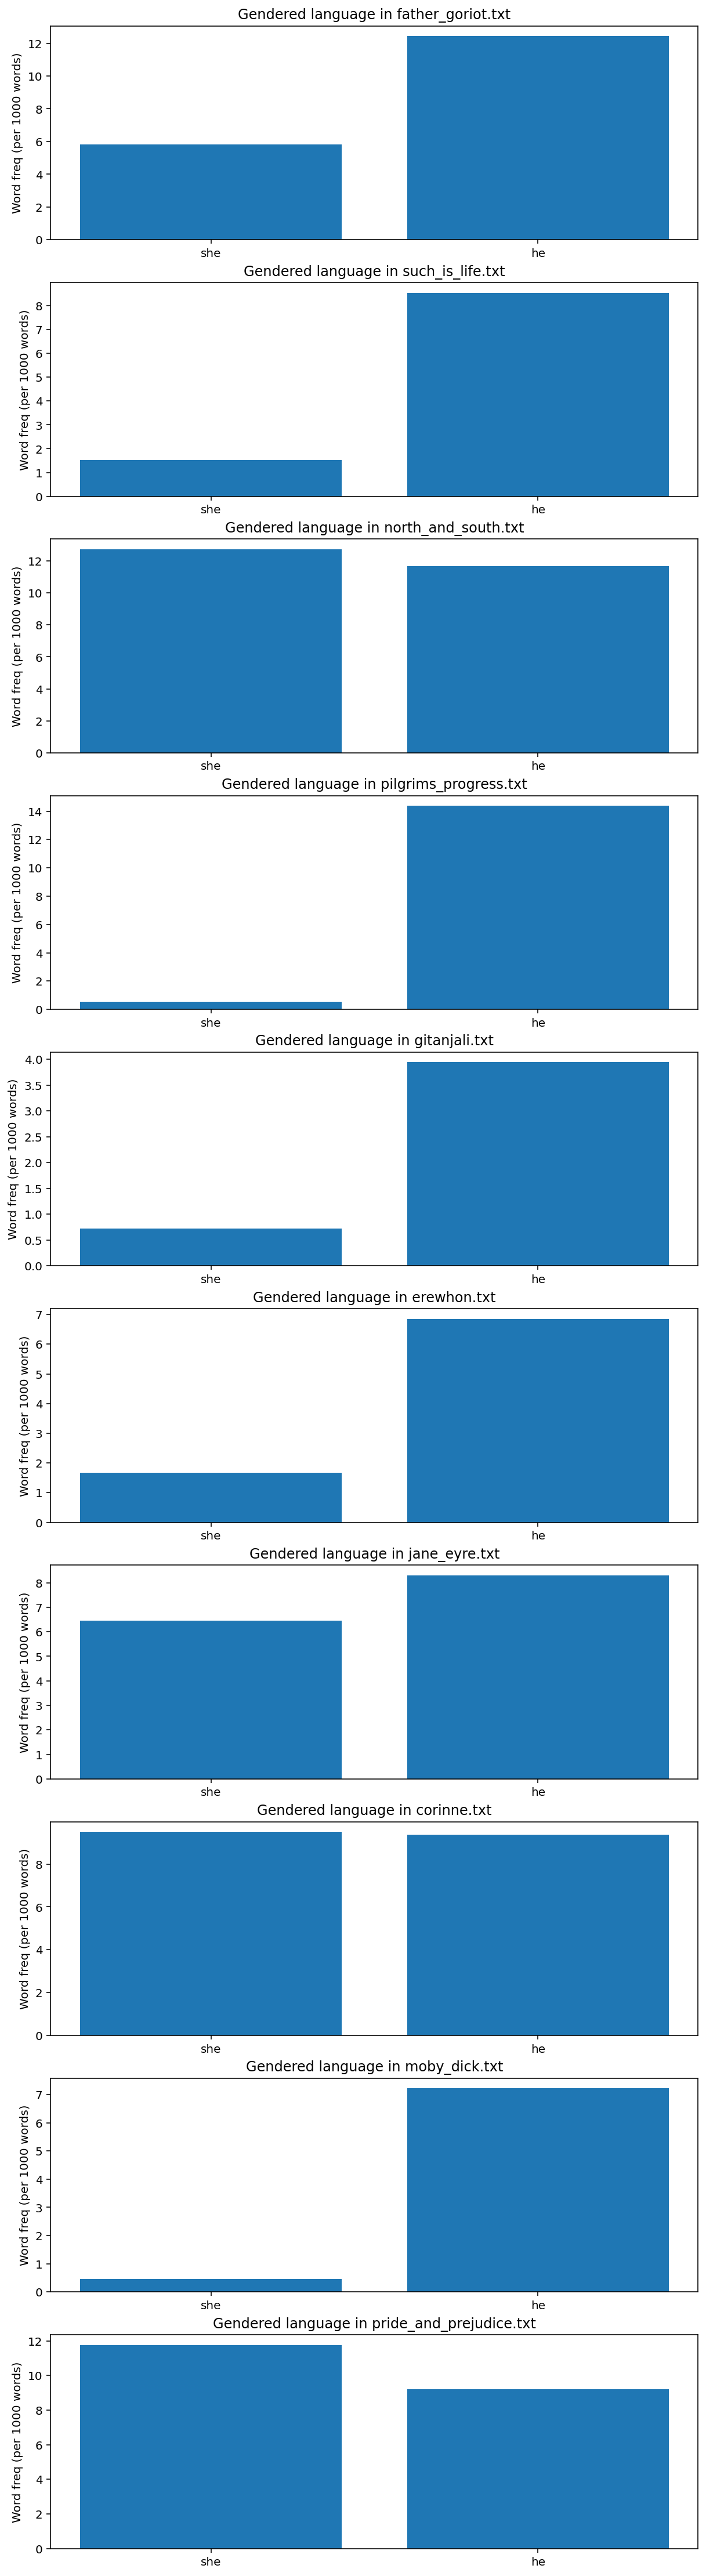

In [47]:
# Gendered language across all the novels
from matplotlib import pyplot as plt

# You can create multiple plots at once using plt.subplots()
fig, axs = plt.subplots(10, figsize=(10,40))
x_values = ['she', 'he']

# We didn't put our text in lower case before we tokenised it, so we will need to search for 'She' and 'she', etc.
for idx,text_dict in enumerate(corpus):
    word_count = len(text_dict['tokens'])

    # Change this code to look for different words (you can do more than two)
    she = text_dict['tokens'].count('she') + text_dict['tokens'].count('She')
    he = text_dict['tokens'].count('he') + text_dict['tokens'].count('He')
    y_values = [she/word_count*1000, he/word_count*1000]

    # If you do search for different words, you might like to change the title of the plot:
    axs[idx].set_title("Gendered language in " + text_dict['title'])

    axs[idx].bar(x_values, y_values)
    axs[idx].set_ylabel('Word freq (per 1000 words)')


## Conclusion

By completing this notebook, you have learned
* How to use `lists` and `dicts` to structure your data
* How to use `for`-loops to iterate over data structures
* How to use regular expressions to search through and manipulate text
* A better method for tokenisation, using existing functions in `nltk`

Ther is no particular extension activity this week, but now that you have imported the corpus, you could try manipulating the example cells above to do different kinds of analysis. Next week, we will anlayse an entire corpus at once, in a more abstract way, in order to attribute an anonymous text to its author.